In [ ]:
# Ejecutar para que funcione el parse_latex en google colab
 
# !pip install sympy==1.5 antlr4-python3-runtime==4.7.1

In [ ]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, stats

init_session()

%matplotlib inline

IPython console for SymPy 1.6.2 (Python 3.6.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [ ]:
def latex_exam(question, parts):
    tex=r"\question "+question+r"\begin{parts} "
    for p in parts :
        tex+=r"\part[1] "+p[0]+r"\begin{solution} "+p[1]+r"\end{solution} " 
    tex+=r"\end{parts} "
    
    return tex

def mostrar_ejercicio(ejercicio,solucion,tipo=0) :
    #tipo=0 se pasa el ejercicio y la solucion en formato latex
    if tipo == 0 :
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion
    elif tipo == 1:
        # falta desarrollar ...
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion

        

In [ ]:
def texto_a_datos(str_datos, tipo=int) :
    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(tipo)
    return datos

def datos_a_tabla(datos) :
    tabla = pd.DataFrame({'$x_i$':np.unique(datos), 
                          '$f_i$':np.unique(datos, return_counts=True)[1],
                          '$F_i$':np.unique(datos, return_counts=True)[1].cumsum(),
                          '$h_i$':np.unique(datos, return_counts=True)[1]/len(datos),  
                          '$H_i$':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), 
                          r'\%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), 
                          r'\%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum(),
                         })
    tabla['$x_if_i$']=tabla['$x_i$']*tabla['$f_i$']
    tabla['$x^2_if_i$']=tabla['$x_i$']**2*tabla['$f_i$']
    
    totales = pd.DataFrame([[np.nan,tabla['$f_i$'].sum(),
                         np.nan, tabla['$h_i$'].sum(), np.nan, tabla[r'\%_i'].sum(), np.nan,
                        tabla['$x_if_i$'].sum(),tabla['$x^2_if_i$'].sum()]],columns=list(tabla.columns))

    tabla=tabla.append(totales,ignore_index=True)
    return tabla

def diagrama_barras(datos) :
    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama ")
#     plt.savefig("../img/diagrama"+n_ejercicio)
    
    return plt.figure

def analisis_discreto(texto_ejercicio, datos, n_ejercicio='_'):
    texto_ejercicio = texto_ejercicio + " ". join(map(str,datos))
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición P70, Q1, Q3, D4',
                   r'Calcular los parámetros de dispersión',
                       r'Realiza un diagrama de caja'
                ]

    enunciado = texto_ejercicio+r". \begin{itemize} \item "+r" \item ".join(enunciado_latex)+ r". \end{itemize}"
    
    tabla = datos_a_tabla(datos)

#     solucion="$"+tabulate(tabla, headers="keys", tablefmt="latex", showindex=False)+r"$"
    solucion="$"+tabulate(tabla, headers="keys", tablefmt="latex_raw", showindex=False)+r"$"



#     d = np.diff(np.unique(datos)).min()
#     left_of_first_bin = datos.min() - float(d)/2
#     right_of_last_bin = datos.max() + float(d)/2
#     plt.clf()
#     plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
#     plt.title("Diagrama ")
#     plt.savefig("../img/diagrama"+n_ejercicio)

#     plt.show()
    fig=diagrama_barras(datos)
    plt.savefig("../img/diagrama"+n_ejercicio)
    plt.show()
    
    plt.boxplot(datos, vert=False)
    plt.savefig("../img/caja"+n_ejercicio)
    plt.show()



    solucion += r"\\ \includegraphics[width=1\columnwidth]{%s}" % ("diagrama"+n_ejercicio)
    solucion += r" \\ $"+latex({"media":datos.mean().round(2), "Me":np.percentile(datos,50), "Mo":stats.mode(datos)})+r"$ \\"
    solucion += "$"+latex({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})+r"$ \\"
    solucion += "$"+latex({"rango":np.amax(datos)-np.amin(datos), "var": np.var(datos).round(2), "desv.tip":sqrt(np.var(datos)).round(2), "C.V": (sqrt(np.var(datos))/abs(np.mean(datos))).round(2)})+r"$"
    solucion += r"\\ \includegraphics[width=1\columnwidth]{%s}" % ("caja"+n_ejercicio)
    
    display(tabla, solucion)
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio



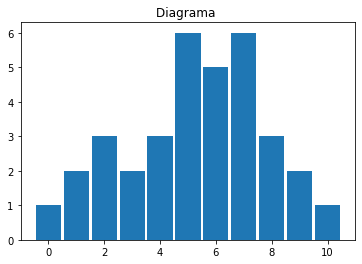

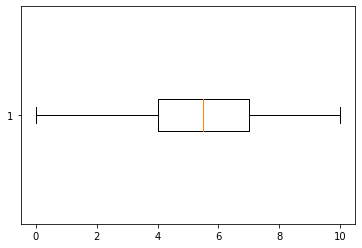

,$x_i$,$f_i$,$F_i$,$h_i$,$H_i$,\%_i,\%A_i,$x_if_i$,$x^2_if_i$
0,0.0,1,1.0,0.029412,0.029412,2.941176,2.941176,0,0
1,1.0,2,3.0,0.058824,0.088235,5.882353,8.823529,2,2
2,2.0,3,6.0,0.088235,0.176471,8.823529,17.647059,6,12
3,3.0,2,8.0,0.058824,0.235294,5.882353,23.529412,6,18
4,4.0,3,11.0,0.088235,0.323529,8.823529,32.352941,12,48
5,5.0,6,17.0,0.176471,0.500000,17.647059,50.000000,30,150
6,6.0,5,22.0,0.147059,0.647059,14.705882,64.705882,30,180
7,7.0,6,28.0,0.176471,0.823529,17.647059,82.352941,42,294
8,8.0,3,31.0,0.088235,0.911765,8.823529,91.176471,24,192
9,9.0,2,33.0,0.058824,0.970588,5.882353,97.058824,18,162


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \\%_i &     \\%A_i &   $x_if_i$ &   $x^2_if_i$ \\\\\n\\hline\n       0 &       1 &       1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &          0 &            0 \\\\\n       1 &       2 &       3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &          2 &            2 \\\\\n       2 &       3 &       6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &          6 &           12 \\\\\n       3 &       2 &       8 & 0.0588235 &   0.235294  &   5.88235 &  23.5294  &          6 &           18 \\\\\n       4 &       3 &      11 & 0.0882353 &   0.323529  &   8.82353 &  32.3529  &         12 &           48 \\\\\n       5 &       6 &      17 & 0.176471  &   0.5       &  17.6471  &  50       &         30 &          150 \\\\\n       6 &       5 &      22 & 0.147059  &   0.647059  &  14.7059  &  64.7059  &         30 &          180 \\\\\n       7 &       6 &      28 & 0.176471  &   

#### Ejercicio:

Las calificaciones de un grupo de 34 alumnos han sido: 9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2. \begin{itemize} \item Realiza una tabla de frecuencias \item Realiza un diagrama de barras \item Calcular los parámetros de centralización \item Calcular los parámetros de posición P70, Q1, Q3, D4 \item Calcular los parámetros de dispersión \item Realiza un diagrama de caja. \end{itemize} $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \%_i &     \%A_i &   $x_if_i$ &   $x^2_if_i$ \\
\hline
       0 &       1 &       1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &          0 &            0 \\
       1 &       2 &       3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &          2 &            2 \\
       2 &       3 &       6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &          6 &           12 \\
       3 &       2 &       8 & 0.0588235 &   0.235294  &   5.88235 &  23.5294  &          6 &           18 \\
       4 &       3 &      11 & 0.0882353 &   0.323529  &   8.82353 &  32.3529  &         12 &           48 \\
       5 &       6 &      17 & 0.176471  &   0.5       &  17.6471  &  50       &         30 &          150 \\
       6 &       5 &      22 & 0.147059  &   0.647059  &  14.7059  &  64.7059  &         30 &          180 \\
       7 &       6 &      28 & 0.176471  &   0.823529  &  17.6471  &  82.3529  &         42 &          294 \\
       8 &       3 &      31 & 0.0882353 &   0.911765  &   8.82353 &  91.1765  &         24 &          192 \\
       9 &       2 &      33 & 0.0588235 &   0.970588  &   5.88235 &  97.0588  &         18 &          162 \\
      10 &       1 &      34 & 0.0294118 &   1         &   2.94118 & 100       &         10 &          100 \\
     nan &      34 &     nan & 1         & nan         & 100       & nan       &        180 &         1158 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama_prueba0} \\ $\left\{ Me : 5.5, \  Mo : \left( [5], \  [6]\right), \  media : 5.29\right\}$ \\$\left\{ D4 : 5.0, \  P70 : 7.0, \  Q1 : 4.0, \  Q3 : 7.0\right\}$ \\$\left\{ C.V : 0.46, \  desv.tip : 2.46, \  rango : 10, \  var : 6.03\right\}$\\ \includegraphics[width=1\columnwidth]{caja_prueba0}

enunciado_latex: Las calificaciones de un grupo de 34 alumnos han sido: 9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2. \begin{itemize} \item Realiza una tabla de frecuencias \item Realiza un diagrama de barras \item Calcular los parámetros de centralización \item Calcular los parámetros de posición P70, Q1, Q3, D4 \item Calcular los parámetros de dispersión \item Realiza un diagrama de caja. \end{itemize}
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \%_i &     \%A_i &   $x_if_i$ &   $x^2_if_i$ \\
\hline
       0 &       1 &       1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &          0 &            0 \\
       1 &       2 &       3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &          2 &            2 \\
       2 &       3 &       6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &          6 &           12 \\
       3 &       2 &       8 & 0.0588235 &   0.235294  &   5.88235 &  

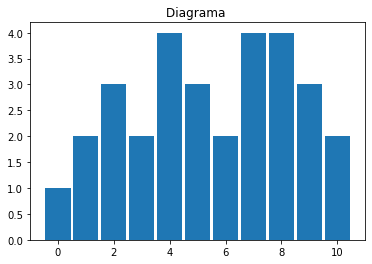

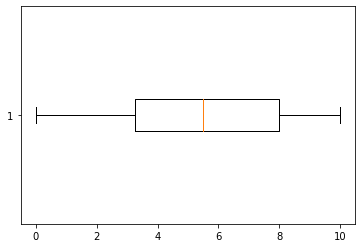

,$x_i$,$f_i$,$F_i$,$h_i$,$H_i$,\%_i,\%A_i,$x_if_i$,$x^2_if_i$
0,0.0,1,1.0,0.033333,0.033333,3.333333,3.333333,0,0
1,1.0,2,3.0,0.066667,0.100000,6.666667,10.000000,2,2
2,2.0,3,6.0,0.100000,0.200000,10.000000,20.000000,6,12
3,3.0,2,8.0,0.066667,0.266667,6.666667,26.666667,6,18
4,4.0,4,12.0,0.133333,0.400000,13.333333,40.000000,16,64
5,5.0,3,15.0,0.100000,0.500000,10.000000,50.000000,15,75
6,6.0,2,17.0,0.066667,0.566667,6.666667,56.666667,12,72
7,7.0,4,21.0,0.133333,0.700000,13.333333,70.000000,28,196
8,8.0,4,25.0,0.133333,0.833333,13.333333,83.333333,32,256
9,9.0,3,28.0,0.100000,0.933333,10.000000,93.333333,27,243


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \\%_i &     \\%A_i &   $x_if_i$ &   $x^2_if_i$ \\\\\n\\hline\n       0 &       1 &       1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &          0 &            0 \\\\\n       1 &       2 &       3 & 0.0666667 &   0.1       &   6.66667 &  10       &          2 &            2 \\\\\n       2 &       3 &       6 & 0.1       &   0.2       &  10       &  20       &          6 &           12 \\\\\n       3 &       2 &       8 & 0.0666667 &   0.266667  &   6.66667 &  26.6667  &          6 &           18 \\\\\n       4 &       4 &      12 & 0.133333  &   0.4       &  13.3333  &  40       &         16 &           64 \\\\\n       5 &       3 &      15 & 0.1       &   0.5       &  10       &  50       &         15 &           75 \\\\\n       6 &       2 &      17 & 0.0666667 &   0.566667  &   6.66667 &  56.6667  &         12 &           72 \\\\\n       7 &       4 &      21 & 0.133333  &   

#### Ejercicio:

Dada la siguiente distribución de datos: 0 1 1 2 2 6 6 7 7 7 2 3 3 4 4 7 8 8 8 8 4 4 5 5 5 9 9 9 10 10. \begin{itemize} \item Realiza una tabla de frecuencias \item Realiza un diagrama de barras \item Calcular los parámetros de centralización \item Calcular los parámetros de posición P70, Q1, Q3, D4 \item Calcular los parámetros de dispersión \item Realiza un diagrama de caja. \end{itemize} $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \%_i &     \%A_i &   $x_if_i$ &   $x^2_if_i$ \\
\hline
       0 &       1 &       1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &          0 &            0 \\
       1 &       2 &       3 & 0.0666667 &   0.1       &   6.66667 &  10       &          2 &            2 \\
       2 &       3 &       6 & 0.1       &   0.2       &  10       &  20       &          6 &           12 \\
       3 &       2 &       8 & 0.0666667 &   0.266667  &   6.66667 &  26.6667  &          6 &           18 \\
       4 &       4 &      12 & 0.133333  &   0.4       &  13.3333  &  40       &         16 &           64 \\
       5 &       3 &      15 & 0.1       &   0.5       &  10       &  50       &         15 &           75 \\
       6 &       2 &      17 & 0.0666667 &   0.566667  &   6.66667 &  56.6667  &         12 &           72 \\
       7 &       4 &      21 & 0.133333  &   0.7       &  13.3333  &  70       &         28 &          196 \\
       8 &       4 &      25 & 0.133333  &   0.833333  &  13.3333  &  83.3333  &         32 &          256 \\
       9 &       3 &      28 & 0.1       &   0.933333  &  10       &  93.3333  &         27 &          243 \\
      10 &       2 &      30 & 0.0666667 &   1         &   6.66667 & 100       &         20 &          200 \\
     nan &      30 &     nan & 1         & nan         & 100       & nan       &        164 &         1138 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama_prueba1} \\ $\left\{ Me : 5.5, \  Mo : \left( [4], \  [4]\right), \  media : 5.47\right\}$ \\$\left\{ D4 : 4.600000000000001, \  P70 : 7.299999999999997, \  Q1 : 3.25, \  Q3 : 8.0\right\}$ \\$\left\{ C.V : 0.52, \  desv.tip : 2.84, \  rango : 10, \  var : 8.05\right\}$\\ \includegraphics[width=1\columnwidth]{caja_prueba1}

enunciado_latex: Dada la siguiente distribución de datos: 0 1 1 2 2 6 6 7 7 7 2 3 3 4 4 7 8 8 8 8 4 4 5 5 5 9 9 9 10 10. \begin{itemize} \item Realiza una tabla de frecuencias \item Realiza un diagrama de barras \item Calcular los parámetros de centralización \item Calcular los parámetros de posición P70, Q1, Q3, D4 \item Calcular los parámetros de dispersión \item Realiza un diagrama de caja. \end{itemize}
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   $x_i$ &   $f_i$ &   $F_i$ &     $h_i$ &       $H_i$ &      \%_i &     \%A_i &   $x_if_i$ &   $x^2_if_i$ \\
\hline
       0 &       1 &       1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &          0 &            0 \\
       1 &       2 &       3 & 0.0666667 &   0.1       &   6.66667 &  10       &          2 &            2 \\
       2 &       3 &       6 & 0.1       &   0.2       &  10       &  20       &          6 &           12 \\
       3 &       2 &       8 & 0.0666667 &   0.266667  &   6.66667 &  26.6667  &          6

In [ ]:
lista_problemas = [
                  ['p089e01','Las calificaciones de un grupo de 34 alumnos han sido: ',r"9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2"],
                ['p198e01','Dada la siguiente distribución de datos: ',r"""0 1 1 2 2
6 6 7 7 7
2 3 3 4 4
7 8 8 8 8
4 4 5 5 5
9 9 9 10 10"""]
                                    ]

question='Responde a las siguientes cuestiones:'
parts=[]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], datos=texto_a_datos(p[2]), n_ejercicio='_prueba'+str(i))
    mostrar_ejercicio(enunciado,solucion)
    parts.append([enunciado, solucion]) 
#     datos = np.loadtxt(p[2].split())
#     datos = datos.astype(int)
#     display(datos)
#     plt.boxplot(datos, vert=False)

print(latex_exam(question, parts))

In [ ]:
tabulate?

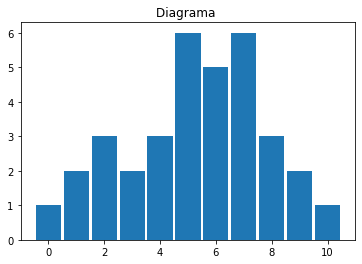

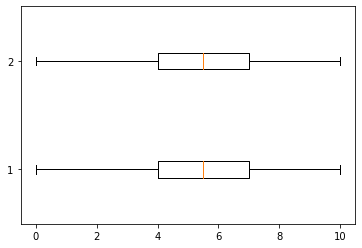

,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,0.0,1,1.0,0.029412,0.029412,2.941176,2.941176,0,0
1,1.0,2,3.0,0.058824,0.088235,5.882353,8.823529,2,2
2,2.0,3,6.0,0.088235,0.176471,8.823529,17.647059,6,12
3,3.0,2,8.0,0.058824,0.235294,5.882353,23.529412,6,18
4,4.0,3,11.0,0.088235,0.323529,8.823529,32.352941,12,48
5,5.0,6,17.0,0.176471,0.500000,17.647059,50.000000,30,150
6,6.0,5,22.0,0.147059,0.647059,14.705882,64.705882,30,180
7,7.0,6,28.0,0.176471,0.823529,17.647059,82.352941,42,294
8,8.0,3,31.0,0.088235,0.911765,8.823529,91.176471,24,192
9,9.0,2,33.0,0.058824,0.970588,5.882353,97.058824,18,162


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   x\\_i &   f\\_i &   F\\_i &       h\\_i &         H\\_i &       \\%\\_i &      \\%A\\_i &   x\\_if\\_i &   x\\^{}2\\_if\\_i \\\\\n\\hline\n     0 &     1 &     1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &        0 &          0 \\\\\n     1 &     2 &     3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &        2 &          2 \\\\\n     2 &     3 &     6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &        6 &         12 \\\\\n     3 &     2 &     8 & 0.0588235 &   0.235294  &   5.88235 &  23.5294  &        6 &         18 \\\\\n     4 &     3 &    11 & 0.0882353 &   0.323529  &   8.82353 &  32.3529  &       12 &         48 \\\\\n     5 &     6 &    17 & 0.176471  &   0.5       &  17.6471  &  50       &       30 &        150 \\\\\n     6 &     5 &    22 & 0.147059  &   0.647059  &  14.7059  &  64.7059  &       30 &        180 \\\\\n     7 &     6 &    28 & 0.176471  &   0.823529  &  17.6471  &  82.3529  &       42 &        294 

#### Ejercicio:

Las calificaciones de un grupo de 34 alumnos han sido: 9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     0 &     1 &     1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &        0 &          0 \\
     1 &     2 &     3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &        2 &          2 \\
     2 &     3 &     6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &        6 &         12 \\
     3 &     2 &     8 & 0.0588235 &   0.235294  &   5.88235 &  23.5294  &        6 &         18 \\
     4 &     3 &    11 & 0.0882353 &   0.323529  &   8.82353 &  32.3529  &       12 &         48 \\
     5 &     6 &    17 & 0.176471  &   0.5       &  17.6471  &  50       &       30 &        150 \\
     6 &     5 &    22 & 0.147059  &   0.647059  &  14.7059  &  64.7059  &       30 &        180 \\
     7 &     6 &    28 & 0.176471  &   0.823529  &  17.6471  &  82.3529  &       42 &        294 \\
     8 &     3 &    31 & 0.0882353 &   0.911765  &   8.82353 &  91.1765  &       24 &        192 \\
     9 &     2 &    33 & 0.0588235 &   0.970588  &   5.88235 &  97.0588  &       18 &        162 \\
    10 &     1 &    34 & 0.0294118 &   1         &   2.94118 & 100       &       10 &        100 \\
   nan &    34 &   nan & 1         & nan         & 100       & nan       &      180 &       1158 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama0} \\ $\left\{ Me : 5.5, \  Mo : \left( [5], \  [6]\right), \  media : 5.29\right\}$ \\$\left\{ D4 : 5.0, \  P70 : 7.0, \  Q1 : 4.0, \  Q3 : 7.0\right\}$ \\$\left\{ C.V : 0.46, \  desv.tip : 2.46, \  rango : 10, \  var : 6.03\right\}$

enunciado_latex: Las calificaciones de un grupo de 34 alumnos han sido: 9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     0 &     1 &     1 & 0.0294118 &   0.0294118 &   2.94118 &   2.94118 &        0 &          0 \\
     1 &     2 &     3 & 0.0588235 &   0.0882353 &   5.88235 &   8.82353 &        2 &          2 \\
     2 &     3 &     6 & 0.0882353 &   0.176471  &   8.82353 &  17.6471  &        6 &         12 \\
     3 &     2 &     8 & 0.0588235 &   0.235294  &   5.88235 &  23.5294  &        6 &         18 \\
     4 &     3 &    11 & 0.0882353 &   0.323529  &   8.82353 &  32.3529  &       12 &

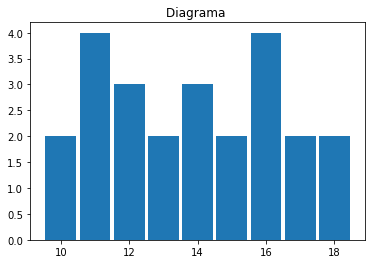

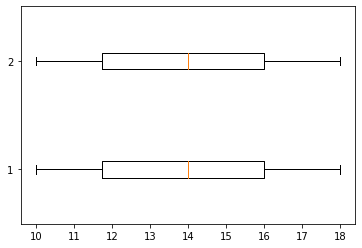

,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,10.0,2,2.0,0.083333,0.083333,8.333333,8.333333,20,200
1,11.0,4,6.0,0.166667,0.250000,16.666667,25.000000,44,484
2,12.0,3,9.0,0.125000,0.375000,12.500000,37.500000,36,432
3,13.0,2,11.0,0.083333,0.458333,8.333333,45.833333,26,338
4,14.0,3,14.0,0.125000,0.583333,12.500000,58.333333,42,588
5,15.0,2,16.0,0.083333,0.666667,8.333333,66.666667,30,450
6,16.0,4,20.0,0.166667,0.833333,16.666667,83.333333,64,1024
7,17.0,2,22.0,0.083333,0.916667,8.333333,91.666667,34,578
8,18.0,2,24.0,0.083333,1.000000,8.333333,100.000000,36,648
9,NaN,24,NaN,1.000000,NaN,100.000000,NaN,332,4742


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   x\\_i &   f\\_i &   F\\_i &       h\\_i &         H\\_i &       \\%\\_i &      \\%A\\_i &   x\\_if\\_i &   x\\^{}2\\_if\\_i \\\\\n\\hline\n    10 &     2 &     2 & 0.0833333 &   0.0833333 &   8.33333 &   8.33333 &       20 &        200 \\\\\n    11 &     4 &     6 & 0.166667  &   0.25      &  16.6667  &  25       &       44 &        484 \\\\\n    12 &     3 &     9 & 0.125     &   0.375     &  12.5     &  37.5     &       36 &        432 \\\\\n    13 &     2 &    11 & 0.0833333 &   0.458333  &   8.33333 &  45.8333  &       26 &        338 \\\\\n    14 &     3 &    14 & 0.125     &   0.583333  &  12.5     &  58.3333  &       42 &        588 \\\\\n    15 &     2 &    16 & 0.0833333 &   0.666667  &   8.33333 &  66.6667  &       30 &        450 \\\\\n    16 &     4 &    20 & 0.166667  &   0.833333  &  16.6667  &  83.3333  &       64 &       1024 \\\\\n    17 &     2 &    22 & 0.0833333 &   0.916667  &   8.33333 &  91.6667  &       34 &        578 

#### Ejercicio:

Estos datos reflejan el tiempo, en minutos, que tardan en llegar a su centro escolar varios alumnos. 10 15 11 11 14 14 11 14 17 11 17 15 10 16 12 12 13 16 13 16 18 12 18 16. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
    10 &     2 &     2 & 0.0833333 &   0.0833333 &   8.33333 &   8.33333 &       20 &        200 \\
    11 &     4 &     6 & 0.166667  &   0.25      &  16.6667  &  25       &       44 &        484 \\
    12 &     3 &     9 & 0.125     &   0.375     &  12.5     &  37.5     &       36 &        432 \\
    13 &     2 &    11 & 0.0833333 &   0.458333  &   8.33333 &  45.8333  &       26 &        338 \\
    14 &     3 &    14 & 0.125     &   0.583333  &  12.5     &  58.3333  &       42 &        588 \\
    15 &     2 &    16 & 0.0833333 &   0.666667  &   8.33333 &  66.6667  &       30 &        450 \\
    16 &     4 &    20 & 0.166667  &   0.833333  &  16.6667  &  83.3333  &       64 &       1024 \\
    17 &     2 &    22 & 0.0833333 &   0.916667  &   8.33333 &  91.6667  &       34 &        578 \\
    18 &     2 &    24 & 0.0833333 &   1         &   8.33333 & 100       &       36 &        648 \\
   nan &    24 &   nan & 1         & nan         & 100       & nan       &      332 &       4742 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama1} \\ $\left\{ Me : 14.0, \  Mo : \left( [11], \  [4]\right), \  media : 13.83\right\}$ \\$\left\{ D4 : 13.0, \  P70 : 16.0, \  Q1 : 11.75, \  Q3 : 16.0\right\}$ \\$\left\{ C.V : 0.18, \  desv.tip : 2.49, \  rango : 8, \  var : 6.22\right\}$

enunciado_latex: Estos datos reflejan el tiempo, en minutos, que tardan en llegar a su centro escolar varios alumnos. 10 15 11 11 14 14 11 14 17 11 17 15 10 16 12 12 13 16 13 16 18 12 18 16. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
    10 &     2 &     2 & 0.0833333 &   0.0833333 &   8.33333 &   8.33333 &       20 &        200 \\
    11 &     4 &     6 & 0.166667  &   0.25      &  16.6667  &  25       &       44 &        484 \\
    12 &     3 &     9 & 0.125     &   0.375     &  12.5     &  37.5     &       36 &        432 \\
    13 &     2 &    11 & 0.0833333 &   0.458333  &   8.33333 &  45.8333  &       26 &        338 \\
    14 &     3 &    14 & 0.125     &

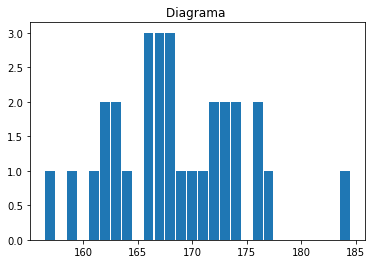

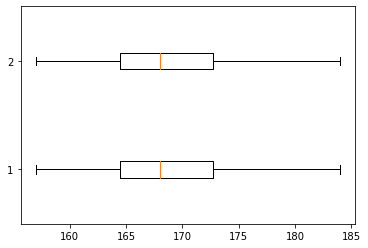

,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,157.0,1,1.0,0.033333,0.033333,3.333333,3.333333,157,24649
1,159.0,1,2.0,0.033333,0.066667,3.333333,6.666667,159,25281
2,161.0,1,3.0,0.033333,0.100000,3.333333,10.000000,161,25921
3,162.0,2,5.0,0.066667,0.166667,6.666667,16.666667,324,52488
4,163.0,2,7.0,0.066667,0.233333,6.666667,23.333333,326,53138
5,164.0,1,8.0,0.033333,0.266667,3.333333,26.666667,164,26896
6,166.0,3,11.0,0.100000,0.366667,10.000000,36.666667,498,82668
7,167.0,3,14.0,0.100000,0.466667,10.000000,46.666667,501,83667
8,168.0,3,17.0,0.100000,0.566667,10.000000,56.666667,504,84672
9,169.0,1,18.0,0.033333,0.600000,3.333333,60.000000,169,28561


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   x\\_i &   f\\_i &   F\\_i &       h\\_i &         H\\_i &       \\%\\_i &      \\%A\\_i &   x\\_if\\_i &   x\\^{}2\\_if\\_i \\\\\n\\hline\n   157 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &      157 &      24649 \\\\\n   159 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &      159 &      25281 \\\\\n   161 &     1 &     3 & 0.0333333 &   0.1       &   3.33333 &  10       &      161 &      25921 \\\\\n   162 &     2 &     5 & 0.0666667 &   0.166667  &   6.66667 &  16.6667  &      324 &      52488 \\\\\n   163 &     2 &     7 & 0.0666667 &   0.233333  &   6.66667 &  23.3333  &      326 &      53138 \\\\\n   164 &     1 &     8 & 0.0333333 &   0.266667  &   3.33333 &  26.6667  &      164 &      26896 \\\\\n   166 &     3 &    11 & 0.1       &   0.366667  &  10       &  36.6667  &      498 &      82668 \\\\\n   167 &     3 &    14 & 0.1       &   0.466667  &  10       &  46.6667  &      501 &      83667 

#### Ejercicio:

La altura en cm de 30 alumnos de un curso son:174 157 168 166 169 168 173 184 176 171 172 168 167 162 162 163 166 166 167 167 174 159 170 172 173 164 161 163 176 177. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
   157 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &      157 &      24649 \\
   159 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &      159 &      25281 \\
   161 &     1 &     3 & 0.0333333 &   0.1       &   3.33333 &  10       &      161 &      25921 \\
   162 &     2 &     5 & 0.0666667 &   0.166667  &   6.66667 &  16.6667  &      324 &      52488 \\
   163 &     2 &     7 & 0.0666667 &   0.233333  &   6.66667 &  23.3333  &      326 &      53138 \\
   164 &     1 &     8 & 0.0333333 &   0.266667  &   3.33333 &  26.6667  &      164 &      26896 \\
   166 &     3 &    11 & 0.1       &   0.366667  &  10       &  36.6667  &      498 &      82668 \\
   167 &     3 &    14 & 0.1       &   0.466667  &  10       &  46.6667  &      501 &      83667 \\
   168 &     3 &    17 & 0.1       &   0.566667  &  10       &  56.6667  &      504 &      84672 \\
   169 &     1 &    18 & 0.0333333 &   0.6       &   3.33333 &  60       &      169 &      28561 \\
   170 &     1 &    19 & 0.0333333 &   0.633333  &   3.33333 &  63.3333  &      170 &      28900 \\
   171 &     1 &    20 & 0.0333333 &   0.666667  &   3.33333 &  66.6667  &      171 &      29241 \\
   172 &     2 &    22 & 0.0666667 &   0.733333  &   6.66667 &  73.3333  &      344 &      59168 \\
   173 &     2 &    24 & 0.0666667 &   0.8       &   6.66667 &  80       &      346 &      59858 \\
   174 &     2 &    26 & 0.0666667 &   0.866667  &   6.66667 &  86.6667  &      348 &      60552 \\
   176 &     2 &    28 & 0.0666667 &   0.933333  &   6.66667 &  93.3333  &      352 &      61952 \\
   177 &     1 &    29 & 0.0333333 &   0.966667  &   3.33333 &  96.6667  &      177 &      31329 \\
   184 &     1 &    30 & 0.0333333 &   1         &   3.33333 & 100       &      184 &      33856 \\
   nan &    30 &   nan & 1         & nan         & 100       & nan       &     5055 &     852797 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama2} \\ $\left\{ Me : 168.0, \  Mo : \left( [166], \  [3]\right), \  media : 168.5\right\}$ \\$\left\{ D4 : 167.0, \  P70 : 172.0, \  Q1 : 164.5, \  Q3 : 172.75\right\}$ \\$\left\{ C.V : 0.03, \  desv.tip : 5.86, \  rango : 27, \  var : 34.32\right\}$

enunciado_latex: La altura en cm de 30 alumnos de un curso son:174 157 168 166 169 168 173 184 176 171 172 168 167 162 162 163 166 166 167 167 174 159 170 172 173 164 161 163 176 177. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
   157 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &      157 &      24649 \\
   159 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &      159 &      25281 \\
   161 &     1 &     3 & 0.0333333 &   0.1       &   3.33333 &  10       &      161 &      25921 \\
   162 &     2 &     5 & 0.0666667 &   0.166667  &   6.66667 &  16.6667  &      324 &      52488 \\
   163 &     2 &     7 & 0.0666667 &   0.23

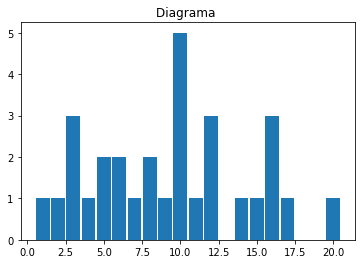

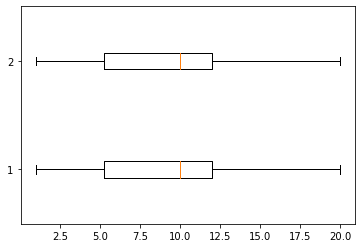

,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,1.0,1,1.0,0.033333,0.033333,3.333333,3.333333,1,1
1,2.0,1,2.0,0.033333,0.066667,3.333333,6.666667,2,4
2,3.0,3,5.0,0.100000,0.166667,10.000000,16.666667,9,27
3,4.0,1,6.0,0.033333,0.200000,3.333333,20.000000,4,16
4,5.0,2,8.0,0.066667,0.266667,6.666667,26.666667,10,50
5,6.0,2,10.0,0.066667,0.333333,6.666667,33.333333,12,72
6,7.0,1,11.0,0.033333,0.366667,3.333333,36.666667,7,49
7,8.0,2,13.0,0.066667,0.433333,6.666667,43.333333,16,128
8,9.0,1,14.0,0.033333,0.466667,3.333333,46.666667,9,81
9,10.0,5,19.0,0.166667,0.633333,16.666667,63.333333,50,500


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   x\\_i &   f\\_i &   F\\_i &       h\\_i &         H\\_i &       \\%\\_i &      \\%A\\_i &   x\\_if\\_i &   x\\^{}2\\_if\\_i \\\\\n\\hline\n     1 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &        1 &          1 \\\\\n     2 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &        2 &          4 \\\\\n     3 &     3 &     5 & 0.1       &   0.166667  &  10       &  16.6667  &        9 &         27 \\\\\n     4 &     1 &     6 & 0.0333333 &   0.2       &   3.33333 &  20       &        4 &         16 \\\\\n     5 &     2 &     8 & 0.0666667 &   0.266667  &   6.66667 &  26.6667  &       10 &         50 \\\\\n     6 &     2 &    10 & 0.0666667 &   0.333333  &   6.66667 &  33.3333  &       12 &         72 \\\\\n     7 &     1 &    11 & 0.0333333 &   0.366667  &   3.33333 &  36.6667  &        7 &         49 \\\\\n     8 &     2 &    13 & 0.0666667 &   0.433333  &   6.66667 &  43.3333  &       16 &        128 

#### Ejercicio:

En un grupo de personas de 1º de Bachillerato hemos preguntado por el número medio de días que
                    practican deporte al mes. Las respuestas han sido las siguientes:16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     1 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &        1 &          1 \\
     2 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &        2 &          4 \\
     3 &     3 &     5 & 0.1       &   0.166667  &  10       &  16.6667  &        9 &         27 \\
     4 &     1 &     6 & 0.0333333 &   0.2       &   3.33333 &  20       &        4 &         16 \\
     5 &     2 &     8 & 0.0666667 &   0.266667  &   6.66667 &  26.6667  &       10 &         50 \\
     6 &     2 &    10 & 0.0666667 &   0.333333  &   6.66667 &  33.3333  &       12 &         72 \\
     7 &     1 &    11 & 0.0333333 &   0.366667  &   3.33333 &  36.6667  &        7 &         49 \\
     8 &     2 &    13 & 0.0666667 &   0.433333  &   6.66667 &  43.3333  &       16 &        128 \\
     9 &     1 &    14 & 0.0333333 &   0.466667  &   3.33333 &  46.6667  &        9 &         81 \\
    10 &     5 &    19 & 0.166667  &   0.633333  &  16.6667  &  63.3333  &       50 &        500 \\
    11 &     1 &    20 & 0.0333333 &   0.666667  &   3.33333 &  66.6667  &       11 &        121 \\
    12 &     3 &    23 & 0.1       &   0.766667  &  10       &  76.6667  &       36 &        432 \\
    14 &     1 &    24 & 0.0333333 &   0.8       &   3.33333 &  80       &       14 &        196 \\
    15 &     1 &    25 & 0.0333333 &   0.833333  &   3.33333 &  83.3333  &       15 &        225 \\
    16 &     3 &    28 & 0.1       &   0.933333  &  10       &  93.3333  &       48 &        768 \\
    17 &     1 &    29 & 0.0333333 &   0.966667  &   3.33333 &  96.6667  &       17 &        289 \\
    20 &     1 &    30 & 0.0333333 &   1         &   3.33333 & 100       &       20 &        400 \\
   nan &    30 &   nan & 1         & nan         & 100       & nan       &      281 &       3359 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama3} \\ $\left\{ Me : 10.0, \  Mo : \left( [10], \  [5]\right), \  media : 9.37\right\}$ \\$\left\{ D4 : 8.0, \  P70 : 12.0, \  Q1 : 5.25, \  Q3 : 12.0\right\}$ \\$\left\{ C.V : 0.53, \  desv.tip : 4.92, \  rango : 19, \  var : 24.23\right\}$

enunciado_latex: En un grupo de personas de 1º de Bachillerato hemos preguntado por el número medio de días que
                    practican deporte al mes. Las respuestas han sido las siguientes:16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &       h\_i &         H\_i &       \%\_i &      \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     1 &     1 &     1 & 0.0333333 &   0.0333333 &   3.33333 &   3.33333 &        1 &          1 \\
     2 &     1 &     2 & 0.0333333 &   0.0666667 &   3.33333 &   6.66667 &        2 &          4 \\
     3 &     3 &     5 & 0.1       &   0.166667  &  10       &  16.6667  &        9 &         27 \\
     4 &     1 &     6 & 0.0333333 &   0.2       &   

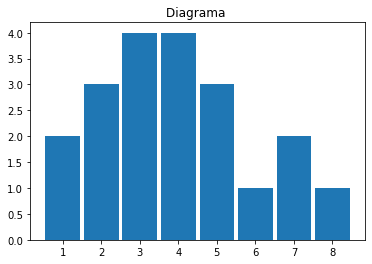

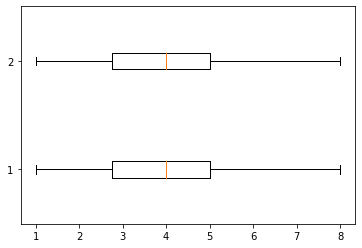

,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,1.0,2,2.0,0.10,0.10,10.0,10.0,2,2
1,2.0,3,5.0,0.15,0.25,15.0,25.0,6,12
2,3.0,4,9.0,0.20,0.45,20.0,45.0,12,36
3,4.0,4,13.0,0.20,0.65,20.0,65.0,16,64
4,5.0,3,16.0,0.15,0.80,15.0,80.0,15,75
5,6.0,1,17.0,0.05,0.85,5.0,85.0,6,36
6,7.0,2,19.0,0.10,0.95,10.0,95.0,14,98
7,8.0,1,20.0,0.05,1.00,5.0,100.0,8,64
8,NaN,20,NaN,1.00,NaN,100.0,NaN,79,387


'$\\begin{tabular}{rrrrrrrrr}\n\\hline\n   x\\_i &   f\\_i &   F\\_i &   h\\_i &    H\\_i &   \\%\\_i &   \\%A\\_i &   x\\_if\\_i &   x\\^{}2\\_if\\_i \\\\\n\\hline\n     1 &     2 &     2 &  0.1  &   0.1  &    10 &     10 &        2 &          2 \\\\\n     2 &     3 &     5 &  0.15 &   0.25 &    15 &     25 &        6 &         12 \\\\\n     3 &     4 &     9 &  0.2  &   0.45 &    20 &     45 &       12 &         36 \\\\\n     4 &     4 &    13 &  0.2  &   0.65 &    20 &     65 &       16 &         64 \\\\\n     5 &     3 &    16 &  0.15 &   0.8  &    15 &     80 &       15 &         75 \\\\\n     6 &     1 &    17 &  0.05 &   0.85 &     5 &     85 &        6 &         36 \\\\\n     7 &     2 &    19 &  0.1  &   0.95 &    10 &     95 &       14 &         98 \\\\\n     8 &     1 &    20 &  0.05 &   1    &     5 &    100 &        8 &         64 \\\\\n   nan &    20 &   nan &  1    & nan    &   100 &    nan &       79 &        387 \\\\\n\\hline\n\\end{tabular}$\\\\ \\includegraphics[widt

#### Ejercicio:

Se realiza una encuesta a un grupo de 20 personas acerca del número 
                  de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 4 5. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión $\to$ $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &   h\_i &    H\_i &   \%\_i &   \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     1 &     2 &     2 &  0.1  &   0.1  &    10 &     10 &        2 &          2 \\
     2 &     3 &     5 &  0.15 &   0.25 &    15 &     25 &        6 &         12 \\
     3 &     4 &     9 &  0.2  &   0.45 &    20 &     45 &       12 &         36 \\
     4 &     4 &    13 &  0.2  &   0.65 &    20 &     65 &       16 &         64 \\
     5 &     3 &    16 &  0.15 &   0.8  &    15 &     80 &       15 &         75 \\
     6 &     1 &    17 &  0.05 &   0.85 &     5 &     85 &        6 &         36 \\
     7 &     2 &    19 &  0.1  &   0.95 &    10 &     95 &       14 &         98 \\
     8 &     1 &    20 &  0.05 &   1    &     5 &    100 &        8 &         64 \\
   nan &    20 &   nan &  1    & nan    &   100 &    nan &       79 &        387 \\
\hline
\end{tabular}$\\ \includegraphics[width=1\columnwidth]{diagrama4} \\ $\left\{ Me : 4.0, \  Mo : \left( [3], \  [4]\right), \  media : 3.95\right\}$ \\$\left\{ D4 : 3.0, \  P70 : 5.0, \  Q1 : 2.75, \  Q3 : 5.0\right\}$ \\$\left\{ C.V : 0.49, \  desv.tip : 1.94, \  rango : 7, \  var : 3.75\right\}$

enunciado_latex: Se realiza una encuesta a un grupo de 20 personas acerca del número 
                  de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 4 5. Realiza una tabla de frecuencias. Realiza un diagrama de barras. Calcular los parámetros de centralización. Calcular los parámetros de posición P70, Q1, Q3, D4. Calcular los parámetros de dispersión
solucion_latex: $\begin{tabular}{rrrrrrrrr}
\hline
   x\_i &   f\_i &   F\_i &   h\_i &    H\_i &   \%\_i &   \%A\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
     1 &     2 &     2 &  0.1  &   0.1  &    10 &     10 &        2 &          2 \\
     2 &     3 &     5 &  0.15 &   0.25 &    15 &     25 &        6 &         12 \\
     3 &     4 &     9 &  0.2  &   0.45 &    20 &     45 &       12 &         36 \\
     4 &     4 &    13 &  0.2  &   0.65 &    20 &     65 &       16 &         64 \\
     5 &     3 &    16 &  0.15 &   0.8  &    15 &     80 &       15 &    

In [ ]:
lista_problemas = [
                  ['p089e01','Las calificaciones de un grupo de 34 alumnos han sido: ',r"9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2"],
                  ['p089e03','Estos datos reflejan el tiempo, en minutos, que tardan en llegar a su centro escolar varios alumnos. ',r"10 15 11 11 14 14 11 14 17 11 17 15 10 16 12 12 13 16 13 16 18 12 18 16"],
                  ['p089e04','La altura en cm de 30 alumnos de un curso son:',r"""174 157 168 166 169 168 173 184 176 171 172 168 
                  167 162 162 163 166 166 167 167 
                  174 159 170 172 173 164 161 163 176 177"""],
                  ['p089e02', """En un grupo de personas de 1º de Bachillerato hemos preguntado por el número medio de días que
                    practican deporte al mes. Las respuestas han sido las siguientes:""",
                  """16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12"""],
                  ['autoevaluacion1',"""Se realiza una encuesta a un grupo de 20 personas acerca del número 
                  de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:""",
                  r"""4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 4 5"""]  
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], datos=texto_a_datos(p[2]), n_ejercicio=str(i))
    mostrar_ejercicio(enunciado,solucion)




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fd426deda10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd426dfba90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd426dd7e50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd426e01590>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd426dedfd0>,
  <matplotlib.lines.Line2D at 0x7fd426e0ac10>]}

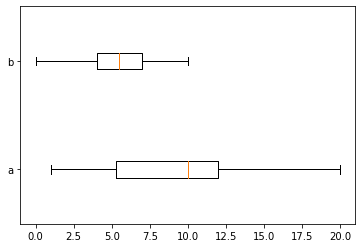

In [ ]:
str1="""16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12"""
str2=r"9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2"
datos = [texto_a_datos(str1),texto_a_datos(str2, tipo=float)]
datos
plt.boxplot(datos, vert=False, labels=['a','b'], manage_ticks=True)

In [ ]:
def analisis_agrupado(texto_ejercicio, str_datos, n_ejercicio='_', bin_size = 10 ):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    
    display(datos)
    
    #dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins=round((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))
    dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins = np.arange(5*int(datos.min()/5), 5*(int(datos.max()/5)+1)+bin_size,bin_size))

    display(dfrec, dagr, )

    display([dagr[i]+bin_size/2 for i in range(len(dagr)-1)])

    marca = [dagr[i]+bin_size/2 for i in range(len(dagr)-1)]

    datos2=[]
    [datos2.append(np.ones(j)*marca[i]) for i, j in enumerate(dfrec) ]
    #datos2.append([np.ones(j)*marca[i] for i, j in enumerate(dfrec) ])


    datos2 = np.concatenate(datos2)
    display(datos2)
    datos = datos2
    display(5*int(datos.min()/5),5*(int(datos.max()/5)+1),int((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))

    #display(np.array(datos2))

    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'r_i':np.unique(datos, return_counts=True)[1]/len(datos), 'R_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \includegraphics[width=1\columnwidth]{%s}" % n_ejercicio)

    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75)})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio

array([ 2,  4, 11, 14,  5,  4])

array([148.5, 153.5, 158.5, 163.5, 168.5, 173.5, 178.5])

,intervalos,x_i,f_i,F_i,h_i,H_i,%_i,%A_i,x_if_i,x^2_if_i
0,148.5-153.5,151.0,2,2.0,0.050,0.050,5.0,5.0,302.0,45602.0
1,153.5-158.5,156.0,4,6.0,0.100,0.150,10.0,15.0,624.0,97344.0
2,158.5-163.5,161.0,11,17.0,0.275,0.425,27.5,42.5,1771.0,285131.0
3,163.5-168.5,166.0,14,31.0,0.350,0.775,35.0,77.5,2324.0,385784.0
4,168.5-173.5,171.0,5,36.0,0.125,0.900,12.5,90.0,855.0,146205.0
5,173.5-178.5,176.0,4,40.0,0.100,1.000,10.0,100.0,704.0,123904.0
6,NaN,NaN,40,NaN,1.000,NaN,100.0,NaN,6580.0,1083970.0


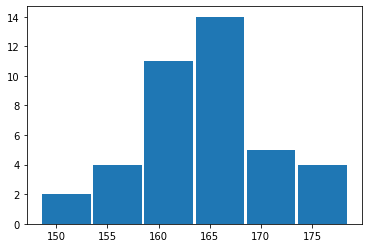

In [ ]:
# str1="""16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12"""
str1="""168
167
178
162
160
161
170
165
160
168
166
165
165
162
165
173
167
158
158
163
154
166
150
164
175
149
163
156
163
163
167
169
175
160
171
174
165
159
164
170"""
datos=texto_a_datos(str1)
extinf=148.5
extsup=178.5
numbin= 6

binsize=(extsup-extinf)/numbin
dfrec, dagr = np.histogram(datos, bins = np.arange(extinf, extsup+1,binsize))
display(dfrec, dagr)
marca = [dagr[i]+binsize/2 for i in range(len(dagr)-1)]
display(marca)

datos2=np.concatenate([np.ones(j)*marca[i] for i, j in enumerate(dfrec)])
datos2
datos_a_tabla(datos2)

intervalos=[str(dagr[i])+"-"+str(dagr[i+1]) for i in range(len(dagr)-1)]
intervalos.append(np.nan)
tabla=pd.concat([pd.DataFrame({'intervalos':intervalos}),datos_a_tabla(datos2)], axis=1)
display(tabla)

# diagrama_barras(datos2)
plt.hist(datos2 , bins=numbin, range=(extinf,extsup), rwidth=0.95)
display(np.percentile(datos2,95))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Funciones

def dibujar_ejes(size=10) :
#     xs = [0, 2, -3, -1.5]
#     ys = [0, 3, 1, -2.5]
#     colors = ['m', 'g', 'r', 'b']

    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -size, size , -size, size
    ticks_frequency = 1
    

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
#     ax.scatter(xs, ys, c=colors)
#     # Draw lines connecting points to axes
#     for x, y, c in zip(xs, ys, colors):
#         ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
#         ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    return fig, ax
    


def añadir_vectores(X,Y,U,V,T,fig,ax, clr='red') :
#    puedes pasar listas o enteros. (X,Y) punto de origen, (u,v) vector
    ax.quiver(X,Y,U,V, angles='xy', scale_units='xy', scale=1, width=0.004, headwidth=3., headlength=4., color=clr)
    if type(X) == list :
        for i in range(len(X)):
            plt.text(X[i]+U[i]/2+0.75,Y[i]+V[i]/2-0.75,r"$\overrightarrow{"+T[i]+r"}$",c=clr)
    else :
        plt.text(X+U/2+0.75,Y+V/2-0.75,r"$\overrightarrow{"+T+r"}$",c=clr)
#     plt.show()
#     fig.savefig("a.png")
    



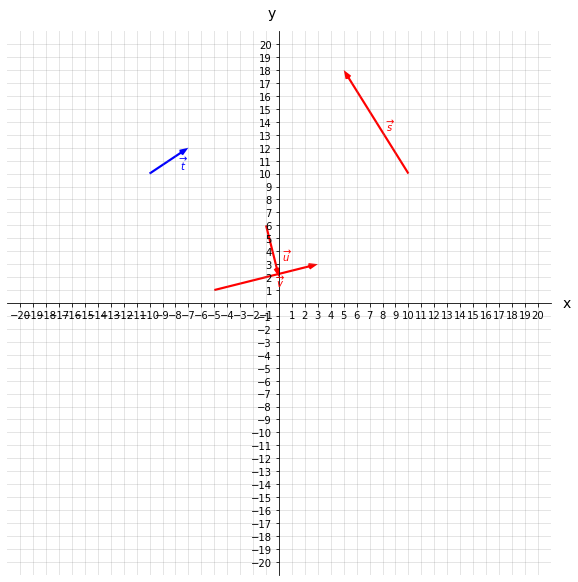

In [ ]:
# Ejemplo de uso

fig, ax =dibujar_ejes(20)    

# datos en listas
X,Y,U,V,T = [-1,-5],[6,1],[1,8],[-4,2],['u','v']   
añadir_vectores(X,Y,U,V,T,fig,ax)
añadir_vectores([10],[10],[-5],[8],['s'],fig,ax)
# datos en enteros
añadir_vectores(-10,10,3,2,'t',fig,ax,'b')
plt.show()

**Representa y calcula las coordenadas de $\overrightarrow{u}+\overrightarrow{v}$**

'u'

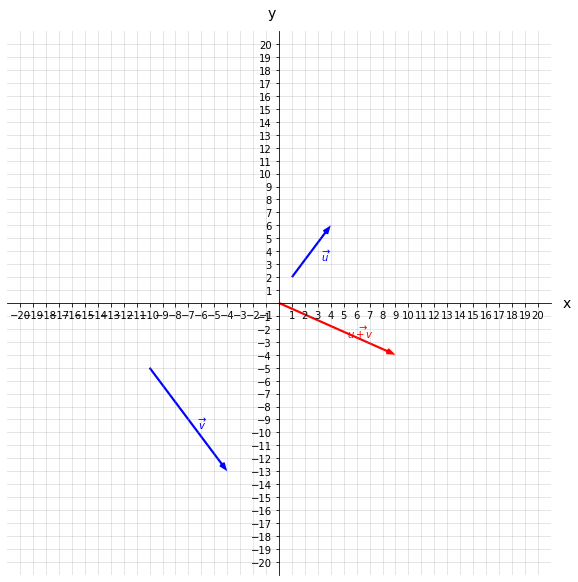

In [ ]:
# Representar y calcular vectores suma

texto_ejercicio = r'Representa y calcula las coordenadas de $\overrightarrow{u}+\overrightarrow{v}$'

display(md("**"+texto_ejercicio+"**"))

datos = [       [[1,2,3,4, 'u'],[-10,-5,6,-8, 'v']],                    
    
                    ]


for d in datos :
    display(d[0][4])
    fig, ax =dibujar_ejes(20)
    for v in d:
        X, Y, U, V, T = v
        añadir_vectores(X, Y, U, V, T,fig,ax,'b')
    sol=[x + y for x, y in zip(d[0],d[1])][-3:-1]
    U,V=sol
    añadir_vectores(0, 0, U, V, 'u+v',fig,ax,'r')
    display(Point(sol))
        
    
#     p1.save('sistema_ine_ex{}.png'.format(j))
#     p1.show()
#     mostrar_ejercicio(r"$"+sist_latex+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{sistema_ine_ex"""+latex(j)+r""".png}}""")
#     lista.append([r"$"+sist_latex+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{sistema_ine_ex"""+latex(j)+r""".png}}"""])
    
# print(latex_exam('Resuelve el siguiente sistema de inecuaciones con dos incógnitas:',lista))

**Representa y calcula las coordenadas de las siguientes combinaciones de $\overrightarrow{u}$ y $\overrightarrow{v}$: **

'$\\overrightarrow{u} + \\overrightarrow{v}$, $\\overrightarrow{u} + 2 \\overrightarrow{v}$, $- 2 \\overrightarrow{u}$. Siendo $\\overrightarrow{u}$ y $\\overrightarrow{v}$: \\\\\\scalebox{.65}{\\includegraphics[width=1\\columnwidth]{comb_lineal_0.png}} \\\\ '

#### Ejercicio:

$\overrightarrow{u} + \overrightarrow{v}$, $\overrightarrow{u} + 2 \overrightarrow{v}$, $- 2 \overrightarrow{u}$. Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_0.png}} \\  $\to$ \scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_sol_0.png}}\\ $Point2D\left(9, -4\right)$, $Point2D\left(15, -12\right)$, $Point2D\left(-6, -8\right)$

enunciado_latex: $\overrightarrow{u} + \overrightarrow{v}$, $\overrightarrow{u} + 2 \overrightarrow{v}$, $- 2 \overrightarrow{u}$. Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_0.png}} \\ 
solucion_latex: \scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_sol_0.png}}\\ $Point2D\left(9, -4\right)$, $Point2D\left(15, -12\right)$, $Point2D\left(-6, -8\right)$


'$\\overrightarrow{u} + \\overrightarrow{v}$, $\\overrightarrow{u} - \\overrightarrow{v}$, $\\overrightarrow{u} + 2 \\overrightarrow{v}$, $2 \\overrightarrow{u} - \\overrightarrow{v}$, $- 2 \\overrightarrow{u}$. Siendo $\\overrightarrow{u}$ y $\\overrightarrow{v}$: \\\\\\scalebox{.65}{\\includegraphics[width=1\\columnwidth]{comb_lineal_1.png}} \\\\ '

#### Ejercicio:

$\overrightarrow{u} + \overrightarrow{v}$, $\overrightarrow{u} - \overrightarrow{v}$, $\overrightarrow{u} + 2 \overrightarrow{v}$, $2 \overrightarrow{u} - \overrightarrow{v}$, $- 2 \overrightarrow{u}$. Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_1.png}} \\  $\to$ \scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_sol_1.png}}\\ $Point2D\left(1, 7\right)$, $Point2D\left(-7, 1\right)$, $Point2D\left(5, 10\right)$, $Point2D\left(-10, 5\right)$, $Point2D\left(6, -8\right)$

enunciado_latex: $\overrightarrow{u} + \overrightarrow{v}$, $\overrightarrow{u} - \overrightarrow{v}$, $\overrightarrow{u} + 2 \overrightarrow{v}$, $2 \overrightarrow{u} - \overrightarrow{v}$, $- 2 \overrightarrow{u}$. Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_1.png}} \\ 
solucion_latex: \scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_sol_1.png}}\\ $Point2D\left(1, 7\right)$, $Point2D\left(-7, 1\right)$, $Point2D\left(5, 10\right)$, $Point2D\left(-10, 5\right)$, $Point2D\left(6, -8\right)$
\question Representa y calcula las coordenadas de las siguientes combinaciones de $\overrightarrow{u}$ y $\overrightarrow{v}$: \begin{parts} \part[1] $\overrightarrow{u} + \overrightarrow{v}$, $\overrightarrow{u} + 2 \overrightarrow{v}$, $- 2 \overrightarrow{u}$. Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_0.png}} \\ \begin{solution} 

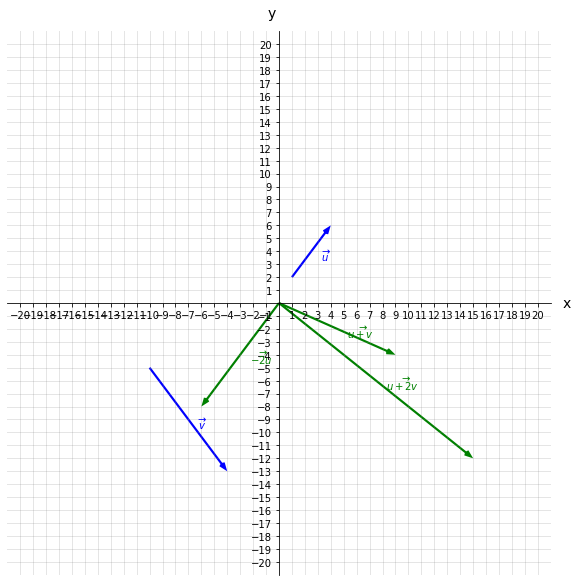

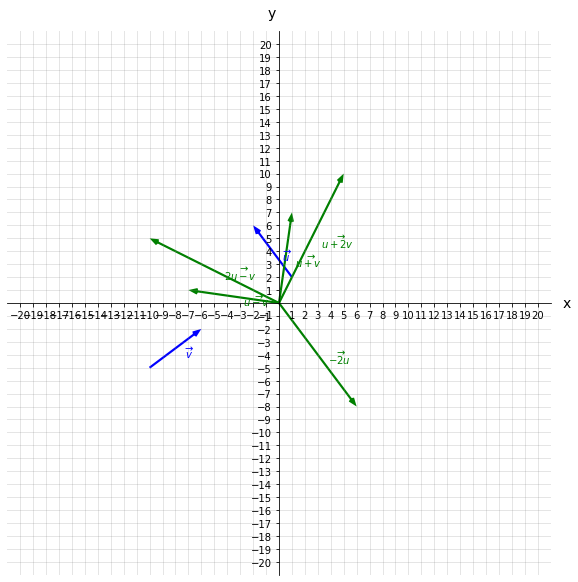

In [ ]:
# Representar y calcular vectores combinaciones lineales

texto_ejercicio = r'Representa y calcula las coordenadas de las siguientes combinaciones de $\overrightarrow{u}$ y $\overrightarrow{v}$: '

display(md("**"+texto_ejercicio+"**"))

datos = [       [[1,2,3,4, 'u'],[-10,-5,6,-8, 'v'],[(1,1),(1,2),(-2,0)]], 
         [[1,2,-3,4, 'u'],[-10,-5,4,3, 'v'],[(1,1),(1,-1),(1,2),(2,-1),(-2,0)]],   
    
                    ]
question=texto_ejercicio
parts=[]

for n, d in enumerate(datos) :
#     display(d[0][4])

    fig, ax =dibujar_ejes(20)
    for v in d[:-1]:
        X, Y, U, V, T = v
        añadir_vectores(X, Y, U, V, T,fig,ax,'b')
    plt.savefig('../img/comb_lineal_'+latex(n)+'.png')
#     sol=[x + y for x, y in zip(d[0],d[1])][-3:-1]
#     U,V=sol
#     añadir_vectores(0, 0, U, V, 'u+v',fig,ax,'r')

    enun = "$"+r"$, $". join([latex(c[0]*x+c[1]*y).replace('x',r'\overrightarrow{u}').replace('y',r'\overrightarrow{v}') for c in d[-1]])+"$"
    enun += r". Siendo $\overrightarrow{u}$ y $\overrightarrow{v}$: \\"
    enun += r"\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_"+latex(n)+r".png}} \\ "

    display(enun)
    puntos_solu=[]
    for c in d[-1]:
#         display([c[0]*x + c[1]*y for x, y in zip(d[0],d[1])][-3:-1])
        U,V = [c[0]*x + c[1]*y for x, y in zip(d[0],d[1])][-3:-1]
        añadir_vectores(0,0,U,V,latex(c[0]*x+c[1]*y).replace('x','u').replace('y','v'),fig,ax,'g')
        display(Point(U,V))
        puntos_solu.append(Point(U,V))
    plt.savefig('../img/comb_lineal_sol_'+latex(n)+'.png')
    sol = r"\scalebox{.65}{\includegraphics[width=1\columnwidth]{comb_lineal_sol_"+latex(n)+r".png}}"
    sol += r"\\ $"+"$, $".join(map(latex,puntos_solu))+"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts))


In [ ]:
# Calcular el punto medio

texto_ejercicio = 'Calcula el punto medio del segmento que une los puntos:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-5,0),(3,7)],
    [(-5,1),(3,7)],
    [(4,-1),(-2,-4)],
    [(1,-5),(5,-3)],

    
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "$A"+latex(i[0])+" y \ B"+latex(i[1])+"$ "
#     enun = enun.replace(r'[',r'(').replace(r']',r')')
    sol = "$M"+latex(list(Point(i[0]).midpoint(Point(i[1]))))+"$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el punto medio del segmento que une los puntos:**

#### Ejercicio:

$A\left( -5, \  1\right) y \ B\left( 3, \  7\right)$  $\to$ $M\left( -1, \  4\right)$

enunciado_latex: $A\left( -5, \  1\right) y \ B\left( 3, \  7\right)$ 
solucion_latex: $M\left( -1, \  4\right)$


#### Ejercicio:

$A\left( 4, \  -1\right) y \ B\left( -2, \  -4\right)$  $\to$ $M\left( 1, \  - \frac{5}{2}\right)$

enunciado_latex: $A\left( 4, \  -1\right) y \ B\left( -2, \  -4\right)$ 
solucion_latex: $M\left( 1, \  - \frac{5}{2}\right)$


#### Ejercicio:

$A\left( 1, \  -5\right) y \ B\left( 5, \  -3\right)$  $\to$ $M\left( 3, \  -4\right)$

enunciado_latex: $A\left( 1, \  -5\right) y \ B\left( 5, \  -3\right)$ 
solucion_latex: $M\left( 3, \  -4\right)$
\question Calcula el punto medio del segmento que une los puntos:\begin{parts} \part[1] $A\left( -5, \  1\right) y \ B\left( 3, \  7\right)$ \begin{solution} $M\left( -1, \  4\right)$\end{solution} \part[1] $A\left( 4, \  -1\right) y \ B\left( -2, \  -4\right)$ \begin{solution} $M\left( 1, \  - \dfrac{5}{2}\right)$\end{solution} \part[1] $A\left( 1, \  -5\right) y \ B\left( 5, \  -3\right)$ \begin{solution} $M\left( 3, \  -4\right)$\end{solution} \end{parts} 


In [ ]:
# Calcular puntos alineados

texto_ejercicio = 'Halla el valor de z para que los puntos A  , B    y C estén alineados. Siendo:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(1, -5), (3, 0) ,  (6,z)],
    [(1, -2), (3, 1) ,  (4,z)],
        [(2, -4), (5, 3) ,  (6,z)],
            [(5, 4), (-5, -2) ,  (1,z)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "$A"+latex(i[0])+"$, $B "+latex(i[1])+"$ y $C"+latex(i[2])+"$ "
    A,B,C = map(Point,i)
    u=B-A
    v=C-A
    s=solve(u[0]*v[1]-u[1]*v[0],z)
    sol = "$"+latex(u)+r"\parallel "+latex(v)+r" \to z="+latex(s)+"$"
#     sol=enun
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\frac'))

**Halla el valor de z para que los puntos A  , B    y C estén alineados. Siendo:**

#### Ejercicio:

$A\left( 1, \  -2\right)$, $B \left( 3, \  1\right)$ y $C\left( 4, \  z\right)$  $\to$ $Point2D\left(2, 3\right)\parallel Point2D\left(3, z + 2\right) \to z=\left[ \frac{5}{2}\right]$

enunciado_latex: $A\left( 1, \  -2\right)$, $B \left( 3, \  1\right)$ y $C\left( 4, \  z\right)$ 
solucion_latex: $Point2D\left(2, 3\right)\parallel Point2D\left(3, z + 2\right) \to z=\left[ \frac{5}{2}\right]$


#### Ejercicio:

$A\left( 2, \  -4\right)$, $B \left( 5, \  3\right)$ y $C\left( 6, \  z\right)$  $\to$ $Point2D\left(3, 7\right)\parallel Point2D\left(4, z + 4\right) \to z=\left[ \frac{16}{3}\right]$

enunciado_latex: $A\left( 2, \  -4\right)$, $B \left( 5, \  3\right)$ y $C\left( 6, \  z\right)$ 
solucion_latex: $Point2D\left(3, 7\right)\parallel Point2D\left(4, z + 4\right) \to z=\left[ \frac{16}{3}\right]$


#### Ejercicio:

$A\left( 5, \  4\right)$, $B \left( -5, \  -2\right)$ y $C\left( 1, \  z\right)$  $\to$ $Point2D\left(-10, -6\right)\parallel Point2D\left(-4, z - 4\right) \to z=\left[ \frac{8}{5}\right]$

enunciado_latex: $A\left( 5, \  4\right)$, $B \left( -5, \  -2\right)$ y $C\left( 1, \  z\right)$ 
solucion_latex: $Point2D\left(-10, -6\right)\parallel Point2D\left(-4, z - 4\right) \to z=\left[ \frac{8}{5}\right]$
\question Halla el valor de z para que los puntos A  , B    y C estén alineados. Siendo:\begin{parts} \part[1] $A\left( 1, \  -2\right)$, $B \left( 3, \  1\right)$ y $C\left( 4, \  z\right)$ \begin{solution} $Point2D\left(2, 3\right)\parallel Point2D\left(3, z + 2\right) \to z=\left[ \frac{5}{2}\right]$\end{solution} \part[1] $A\left( 2, \  -4\right)$, $B \left( 5, \  3\right)$ y $C\left( 6, \  z\right)$ \begin{solution} $Point2D\left(3, 7\right)\parallel Point2D\left(4, z + 4\right) \to z=\left[ \frac{16}{3}\right]$\end{solution} \part[1] $A\left( 5, \  4\right)$, $B \left( -5, \  -2\right)$ y $C\left( 1, \  z\right)$ \begin{solution} $Point2D\left(-10, -6\right)\parallel Point2D\left(-4, z - 4\right) \to z=\left[ \frac{8}{5}\right]$\end{solution} \end{parts} 


In [ ]:
# Calcular el punto simétrico

texto_ejercicio = 'Calcula el punto simétrico:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-7,-15),(2,0)],
    [(7,6),(2,1)],
    [(5,-3),(1,3)],
    [(6,-5),(-3,2)],
    [(-6,-2),(4,1)],
    
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "De $A"+latex(i[0])+"$ respecto  de  $M"+latex(i[1])+"$ "
#     enun = enun.replace(r'[',r'(').replace(r']',r')')
    A,M = map(Point, i)
    B=(x,y)
    sol = "$"+latex(Eq(A.midpoint(B),M))+r"\to A'\left("+",".join([latex(i[0]) for i in list(map(solve,list(A.midpoint(B)-M)))])+r"\right)$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el punto simétrico:**

#### Ejercicio:

De $A\left( 7, \  6\right)$ respecto  de  $M\left( 2, \  1\right)$  $\to$ $Point2D\left(\frac{x}{2} + \frac{7}{2}, \frac{y}{2} + 3\right) = Point2D\left(2, 1\right)\to A'\left(-3,-4\right)$

enunciado_latex: De $A\left( 7, \  6\right)$ respecto  de  $M\left( 2, \  1\right)$ 
solucion_latex: $Point2D\left(\frac{x}{2} + \frac{7}{2}, \frac{y}{2} + 3\right) = Point2D\left(2, 1\right)\to A'\left(-3,-4\right)$


#### Ejercicio:

De $A\left( 5, \  -3\right)$ respecto  de  $M\left( 1, \  3\right)$  $\to$ $Point2D\left(\frac{x}{2} + \frac{5}{2}, \frac{y}{2} - \frac{3}{2}\right) = Point2D\left(1, 3\right)\to A'\left(-3,9\right)$

enunciado_latex: De $A\left( 5, \  -3\right)$ respecto  de  $M\left( 1, \  3\right)$ 
solucion_latex: $Point2D\left(\frac{x}{2} + \frac{5}{2}, \frac{y}{2} - \frac{3}{2}\right) = Point2D\left(1, 3\right)\to A'\left(-3,9\right)$


#### Ejercicio:

De $A\left( 6, \  -5\right)$ respecto  de  $M\left( -3, \  2\right)$  $\to$ $Point2D\left(\frac{x}{2} + 3, \frac{y}{2} - \frac{5}{2}\right) = Point2D\left(-3, 2\right)\to A'\left(-12,9\right)$

enunciado_latex: De $A\left( 6, \  -5\right)$ respecto  de  $M\left( -3, \  2\right)$ 
solucion_latex: $Point2D\left(\frac{x}{2} + 3, \frac{y}{2} - \frac{5}{2}\right) = Point2D\left(-3, 2\right)\to A'\left(-12,9\right)$


#### Ejercicio:

De $A\left( -6, \  -2\right)$ respecto  de  $M\left( 4, \  1\right)$  $\to$ $Point2D\left(\frac{x}{2} - 3, \frac{y}{2} - 1\right) = Point2D\left(4, 1\right)\to A'\left(14,4\right)$

enunciado_latex: De $A\left( -6, \  -2\right)$ respecto  de  $M\left( 4, \  1\right)$ 
solucion_latex: $Point2D\left(\frac{x}{2} - 3, \frac{y}{2} - 1\right) = Point2D\left(4, 1\right)\to A'\left(14,4\right)$
\question Calcula el punto simétrico:\begin{parts} \part[1] De $A\left( 7, \  6\right)$ respecto  de  $M\left( 2, \  1\right)$ \begin{solution} $Point2D\left(\dfrac{x}{2} + \dfrac{7}{2}, \dfrac{y}{2} + 3\right) = Point2D\left(2, 1\right)\to A'\left(-3,-4\right)$\end{solution} \part[1] De $A\left( 5, \  -3\right)$ respecto  de  $M\left( 1, \  3\right)$ \begin{solution} $Point2D\left(\dfrac{x}{2} + \dfrac{5}{2}, \dfrac{y}{2} - \dfrac{3}{2}\right) = Point2D\left(1, 3\right)\to A'\left(-3,9\right)$\end{solution} \part[1] De $A\left( 6, \  -5\right)$ respecto  de  $M\left( -3, \  2\right)$ \begin{solution} $Point2D\left(\dfrac{x}{2} + 3, \dfrac{y}{2} - \dfrac{5}{2}\right) = Point2D\left(-3, 2\right)\to A'\left(-12,9\right)$\end{solution} \part[1] De $A\left( -6, \  -2\right)$ respecto  

In [ ]:
# Calcular punto de paralelogramo

texto_ejercicio = 'Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(1, -1), (0, 2), (6, 5)],
    [(2, -3), (0, 1), (4, 3)],
    [(1, -1), (1, 1), (2, 3)],
    [(-2, -3), (-2, 2), (5,4)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "Siendo $A$, $B$ y $C$ respectivamente: $"+" $, $".join(map(latex,i))+"$"
    A, B, C = map(Point,i)
    D = Point(x,y)
    sol=r"$\overrightarrow{AB} = \overrightarrow{DC} \to "+latex(Eq(B-A, C-D))+r" \to D"
    sol += latex([i[0] for i in list(map(solve,list(B-A-C+D)))])+"$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo**

#### Ejercicio:

Siendo $A$, $B$ y $C$ respectivamente: $\left( 2, \  -3\right) $, $\left( 0, \  1\right) $, $\left( 4, \  3\right)$ $\to$ $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-2, 4\right) = Point2D\left(4 - x, 3 - y\right) \to D\left( 6, \  -1\right)$

enunciado_latex: Siendo $A$, $B$ y $C$ respectivamente: $\left( 2, \  -3\right) $, $\left( 0, \  1\right) $, $\left( 4, \  3\right)$
solucion_latex: $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-2, 4\right) = Point2D\left(4 - x, 3 - y\right) \to D\left( 6, \  -1\right)$


#### Ejercicio:

Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 1, \  1\right) $, $\left( 2, \  3\right)$ $\to$ $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(0, 2\right) = Point2D\left(2 - x, 3 - y\right) \to D\left( 2, \  1\right)$

enunciado_latex: Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 1, \  1\right) $, $\left( 2, \  3\right)$
solucion_latex: $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(0, 2\right) = Point2D\left(2 - x, 3 - y\right) \to D\left( 2, \  1\right)$


#### Ejercicio:

Siendo $A$, $B$ y $C$ respectivamente: $\left( -2, \  -3\right) $, $\left( -2, \  2\right) $, $\left( 5, \  4\right)$ $\to$ $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(0, 5\right) = Point2D\left(5 - x, 4 - y\right) \to D\left( 5, \  -1\right)$

enunciado_latex: Siendo $A$, $B$ y $C$ respectivamente: $\left( -2, \  -3\right) $, $\left( -2, \  2\right) $, $\left( 5, \  4\right)$
solucion_latex: $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(0, 5\right) = Point2D\left(5 - x, 4 - y\right) \to D\left( 5, \  -1\right)$
\question Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo\begin{parts} \part[1] Siendo $A$, $B$ y $C$ respectivamente: $\left( 2, \  -3\right) $, $\left( 0, \  1\right) $, $\left( 4, \  3\right)$\begin{solution} $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-2, 4\right) = Point2D\left(4 - x, 3 - y\right) \to D\left( 6, \  -1\right)$\end{solution} \part[1] Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 1, \  1\right) $, $\left( 2, \  3\right)$\begin{solution} $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(0, 2\right) = Point2D\left(2 - x, 3 - y\right) \to D\left( 2, \  1\right)$\end{solution} \part[1] Siendo $A$, $B$ y $

In [ ]:
# Calcular rectas

texto_ejercicio = 'Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(3, -2), (-1, 5)],
        [(3, -1), (-2, 5)],
        [(1, -3), (3, -2)],
        [(2, 3), (-3, 5)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $"+" $, $".join(map(latex,i))+"$"
    P, d = map(Point,i)
    r=Line(P, P+d)
    sol=r"Solución orientativa: $"+latex(Eq(Point(x,y),(r.arbitrary_point())))+r" \to "
    sol += latex(Eq(r.equation(),0))+r" \to "+latex(Eq(y,solve(r.equation(y=y),y)[0]))+"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:**

#### Ejercicio:

Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -1\right) $, $\left( -2, \  5\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(3 - 2 t, 5 t - 1\right) \to - 5 x - 2 y + 13 = 0 \to y = \frac{13}{2} - \frac{5 x}{2}$

enunciado_latex: Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -1\right) $, $\left( -2, \  5\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(3 - 2 t, 5 t - 1\right) \to - 5 x - 2 y + 13 = 0 \to y = \frac{13}{2} - \frac{5 x}{2}$


#### Ejercicio:

Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 1, \  -3\right) $, $\left( 3, \  -2\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(3 t + 1, - 2 t - 3\right) \to 2 x + 3 y + 7 = 0 \to y = - \frac{2 x}{3} - \frac{7}{3}$

enunciado_latex: Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 1, \  -3\right) $, $\left( 3, \  -2\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(3 t + 1, - 2 t - 3\right) \to 2 x + 3 y + 7 = 0 \to y = - \frac{2 x}{3} - \frac{7}{3}$


#### Ejercicio:

Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 2, \  3\right) $, $\left( -3, \  5\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(2 - 3 t, 5 t + 3\right) \to - 5 x - 3 y + 19 = 0 \to y = \frac{19}{3} - \frac{5 x}{3}$

enunciado_latex: Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 2, \  3\right) $, $\left( -3, \  5\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(2 - 3 t, 5 t + 3\right) \to - 5 x - 3 y + 19 = 0 \to y = \frac{19}{3} - \frac{5 x}{3}$
\question Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:\begin{parts} \part[1] Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -1\right) $, $\left( -2, \  5\right)$\begin{solution} Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(3 - 2 t, 5 t - 1\right) \to - 5 x - 2 y + 13 = 0 \to y = \dfrac{13}{2} - \dfrac{5 x}{2}$\end{solution} \part[1] Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 1, \  -3\right) $, $\left( 3, \  -2\right)$\begin{solution} Solución orientativa: $Point2D\left(x, y\right) = Point2D\lef

In [ ]:
# Calcular rectas

texto_ejercicio = 'Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(3, -2), (-1, 5)],
            [(2, -1), (-2, 5)],
        [(2, -3), (3, -2)],
        [(-4, 3), (-3, 5)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"Pasa por los puntos $P$ y $Q$ respectivamente: $"+" $, $".join(map(latex,i))+"$"
    P, Q = map(Point,i)
    r=Line(P, Q)
    sol=r"Solución orientativa: $"+latex(Eq(Point(x,y),(r.arbitrary_point())))+r" \to "
    sol += latex(Eq(r.equation(),0))+r" \to "+latex(Eq(y,solve(r.equation(y=y),y)[0]))+"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:**

#### Ejercicio:

Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -1\right) $, $\left( -2, \  5\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(2 - 4 t, 6 t - 1\right) \to - 6 x - 4 y + 8 = 0 \to y = 2 - \frac{3 x}{2}$

enunciado_latex: Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -1\right) $, $\left( -2, \  5\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(2 - 4 t, 6 t - 1\right) \to - 6 x - 4 y + 8 = 0 \to y = 2 - \frac{3 x}{2}$


#### Ejercicio:

Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -3\right) $, $\left( 3, \  -2\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(t + 2, t - 3\right) \to - x + y + 5 = 0 \to y = x - 5$

enunciado_latex: Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -3\right) $, $\left( 3, \  -2\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(t + 2, t - 3\right) \to - x + y + 5 = 0 \to y = x - 5$


#### Ejercicio:

Pasa por los puntos $P$ y $Q$ respectivamente: $\left( -4, \  3\right) $, $\left( -3, \  5\right)$ $\to$ Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(t - 4, 2 t + 3\right) \to - 2 x + y - 11 = 0 \to y = 2 x + 11$

enunciado_latex: Pasa por los puntos $P$ y $Q$ respectivamente: $\left( -4, \  3\right) $, $\left( -3, \  5\right)$
solucion_latex: Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(t - 4, 2 t + 3\right) \to - 2 x + y - 11 = 0 \to y = 2 x + 11$
\question Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:\begin{parts} \part[1] Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -1\right) $, $\left( -2, \  5\right)$\begin{solution} Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(2 - 4 t, 6 t - 1\right) \to - 6 x - 4 y + 8 = 0 \to y = 2 - \dfrac{3 x}{2}$\end{solution} \part[1] Pasa por los puntos $P$ y $Q$ respectivamente: $\left( 2, \  -3\right) $, $\left( 3, \  -2\right)$\begin{solution} Solución orientativa: $Point2D\left(x, y\right) = Point2D\left(t + 2, t - 3\right) \to - x + y + 5 = 0 \to y = x - 5$\end{solution} \part[1] Pasa por los puntos $P$ y $Q$ respectivamente: $\left( -4, \  3\right) $, $\left( 

In [ ]:
# Calcular rectas paralelas

texto_ejercicio = 'Calcula la recta $s$ que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-3, 2), 8*x-3*y+6],
              [(3, 1), 4*x-2*y+1],
      [(-1, 2), 2*x-3*y+1],

    
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"pasa por P${}$ y es paralela a $r \equiv {} = 0$".format(latex(i[0]),latex(i[1]))
    s=Line(i[1]).parallel_line(Point(i[0]))
    sol=r"$s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la recta $s$ que:**

#### Ejercicio:

pasa por P$\left( 3, \  1\right)$ y es paralela a $r \equiv 4 x - 2 y + 1 = 0$ $\to$ $s\equiv y = 2 x - 5$

enunciado_latex: pasa por P$\left( 3, \  1\right)$ y es paralela a $r \equiv 4 x - 2 y + 1 = 0$
solucion_latex: $s\equiv y = 2 x - 5$


#### Ejercicio:

pasa por P$\left( -1, \  2\right)$ y es paralela a $r \equiv 2 x - 3 y + 1 = 0$ $\to$ $s\equiv y = \frac{2 x}{3} + \frac{8}{3}$

enunciado_latex: pasa por P$\left( -1, \  2\right)$ y es paralela a $r \equiv 2 x - 3 y + 1 = 0$
solucion_latex: $s\equiv y = \frac{2 x}{3} + \frac{8}{3}$
\question Calcula la recta $s$ que:\begin{parts} \part[1] pasa por P$\left( 3, \  1\right)$ y es paralela a $r \equiv 4 x - 2 y + 1 = 0$\begin{solution} $s\equiv y = 2 x - 5$\end{solution} \part[1] pasa por P$\left( -1, \  2\right)$ y es paralela a $r \equiv 2 x - 3 y + 1 = 0$\begin{solution} $s\equiv y = \dfrac{2 x}{3} + \dfrac{8}{3}$\end{solution} \end{parts} 


In [ ]:
# Calcular rectas y cortes

texto_ejercicio = 'Calcula la recta $s$ que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(3,-2), (2,1)],
#     [(3,-2), (-5,4)],
#     [(3,-2), (-1,0)],
        [(-1,2), (-2,1)],
    [(1,-2), (5,-4)],
    [(1,-2), (-1,0)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"pasa por P$"+latex(i[0])+"$ y es perpendicular a $\overrightarrow{v}"+latex(i[1])+"$"
    p, v = map(Point,i)
    s=Line(p,p+v).perpendicular_line(p)
    sol=r"$s\equiv "+latex(Eq(s.equation(),0))+"$"
#     sol+=r"$\to s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la recta $s$ que:**

#### Ejercicio:

pasa por P$\left( -1, \  2\right)$ y es perpendicular a $\overrightarrow{v}\left( -2, \  1\right)$ $\to$ $s\equiv 2 x - y + 4 = 0$

enunciado_latex: pasa por P$\left( -1, \  2\right)$ y es perpendicular a $\overrightarrow{v}\left( -2, \  1\right)$
solucion_latex: $s\equiv 2 x - y + 4 = 0$


#### Ejercicio:

pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( 5, \  -4\right)$ $\to$ $s\equiv - 5 x + 4 y + 13 = 0$

enunciado_latex: pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( 5, \  -4\right)$
solucion_latex: $s\equiv - 5 x + 4 y + 13 = 0$


#### Ejercicio:

pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( -1, \  0\right)$ $\to$ $s\equiv x - 1 = 0$

enunciado_latex: pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( -1, \  0\right)$
solucion_latex: $s\equiv x - 1 = 0$
\question Calcula la recta $s$ que:\begin{parts} \part[1] pasa por P$\left( -1, \  2\right)$ y es perpendicular a $\overrightarrow{v}\left( -2, \  1\right)$\begin{solution} $s\equiv 2 x - y + 4 = 0$\end{solution} \part[1] pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( 5, \  -4\right)$\begin{solution} $s\equiv - 5 x + 4 y + 13 = 0$\end{solution} \part[1] pasa por P$\left( 1, \  -2\right)$ y es perpendicular a $\overrightarrow{v}\left( -1, \  0\right)$\begin{solution} $s\equiv x - 1 = 0$\end{solution} \end{parts} 


In [ ]:
# Calcular rectas y cortes

texto_ejercicio = 'Calcula la recta $s$ que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-3, 2), 8*x-3*y+6],
                  [(3, 1), 4*x-2*y+1],
      [(-1, 2), 2*x-3*y+1],

                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"pasa por P${}$ y es perpendicular a $r \equiv {} = 0$".format(latex(i[0]),latex(i[1]))
    s=Line(i[1]).perpendicular_line(Point(i[0]))
    sol=r"$s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la recta $s$ que:**

#### Ejercicio:

pasa por P$\left( 3, \  1\right)$ y es perpendicular a $r \equiv 4 x - 2 y + 1 = 0$ $\to$ $s\equiv y = \frac{5}{2} - \frac{x}{2}$

enunciado_latex: pasa por P$\left( 3, \  1\right)$ y es perpendicular a $r \equiv 4 x - 2 y + 1 = 0$
solucion_latex: $s\equiv y = \frac{5}{2} - \frac{x}{2}$


#### Ejercicio:

pasa por P$\left( -1, \  2\right)$ y es perpendicular a $r \equiv 2 x - 3 y + 1 = 0$ $\to$ $s\equiv y = \frac{1}{2} - \frac{3 x}{2}$

enunciado_latex: pasa por P$\left( -1, \  2\right)$ y es perpendicular a $r \equiv 2 x - 3 y + 1 = 0$
solucion_latex: $s\equiv y = \frac{1}{2} - \frac{3 x}{2}$
\question Calcula la recta $s$ que:\begin{parts} \part[1] pasa por P$\left( 3, \  1\right)$ y es perpendicular a $r \equiv 4 x - 2 y + 1 = 0$\begin{solution} $s\equiv y = \dfrac{5}{2} - \dfrac{x}{2}$\end{solution} \part[1] pasa por P$\left( -1, \  2\right)$ y es perpendicular a $r \equiv 2 x - 3 y + 1 = 0$\begin{solution} $s\equiv y = \dfrac{1}{2} - \dfrac{3 x}{2}$\end{solution} \end{parts} 


In [ ]:
# Calcular rectas y cortes

texto_ejercicio = 'Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-3, 2), 8*x-3*y+6, (9, -5/2), 2*x+y-7],
      [(1, -2), 6*x-3*y+6, (3, 1), 2*x+y-7],
          [(1, 3), 4*x-2*y+1, (3, 1), 2*x+y-3],
    
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"r pasa por ${}$ y es perpendicular a ${} = 0$. Y s pasa por ${}$ y es paralela a ${}= 0$".format(latex(i[0]),latex(i[1]),latex(i[2]),latex(i[3]))
    r=Line(i[1]).perpendicular_line(Point(i[0]))
    Eq(y,solve(r.equation(y=y),y)[0])

    s=Line(i[3]).parallel_line(Point(i[2]))
    Eq(y,solve(s.equation(y=y),y)[0])
    sol=r"Solución: \\ $r\equiv "+latex(Eq(y,solve(r.equation(y=y),y)[0]))+r"$ \\ $s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"\to  $$"+latex(r.intersection(s))+r" $ "
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:**

#### Ejercicio:

r pasa por $\left( 1, \  -2\right)$ y es perpendicular a $6 x - 3 y + 6 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 7= 0$ $\to$ Solución: \\ $r\equiv y = - \frac{x}{2} - \frac{3}{2}$ \\ $s\equiv y = 7 - 2 x\to  $$\left[ Point2D\left(\frac{17}{3}, - \frac{13}{3}\right)\right] $ 

enunciado_latex: r pasa por $\left( 1, \  -2\right)$ y es perpendicular a $6 x - 3 y + 6 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 7= 0$
solucion_latex: Solución: \\ $r\equiv y = - \frac{x}{2} - \frac{3}{2}$ \\ $s\equiv y = 7 - 2 x\to  $$\left[ Point2D\left(\frac{17}{3}, - \frac{13}{3}\right)\right] $ 


#### Ejercicio:

r pasa por $\left( 1, \  3\right)$ y es perpendicular a $4 x - 2 y + 1 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 3= 0$ $\to$ Solución: \\ $r\equiv y = \frac{7}{2} - \frac{x}{2}$ \\ $s\equiv y = 7 - 2 x\to  $$\left[ Point2D\left(\frac{7}{3}, \frac{7}{3}\right)\right] $ 

enunciado_latex: r pasa por $\left( 1, \  3\right)$ y es perpendicular a $4 x - 2 y + 1 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 3= 0$
solucion_latex: Solución: \\ $r\equiv y = \frac{7}{2} - \frac{x}{2}$ \\ $s\equiv y = 7 - 2 x\to  $$\left[ Point2D\left(\frac{7}{3}, \frac{7}{3}\right)\right] $ 
\question Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:\begin{parts} \part[1] r pasa por $\left( 1, \  -2\right)$ y es perpendicular a $6 x - 3 y + 6 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 7= 0$\begin{solution} Solución: \\ $r\equiv y = - \dfrac{x}{2} - \dfrac{3}{2}$ \\ $s\equiv y = 7 - 2 x\to  $$\left[ Point2D\left(\dfrac{17}{3}, - \dfrac{13}{3}\right)\right] $ \end{solution} \part[1] r pasa por $\left( 1, \  3\right)$ y es perpendicular a $4 x - 2 y + 1 = 0$. Y s pasa por $\left( 3, \  1\right)$ y es paralela a $2 x + y - 3= 0$\begin{solution} Solución: \\ $r\equiv y = \dfrac{7}{2} - \dfrac{x}{2

In [ ]:
# Calcular distancias

texto_ejercicio = 'Calcula la distancia entre $P$ y $Q$ siendo:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(3, 5), (3,-7)],
#     [(-8, 3), (-6,1)],
#     [(0, -3), (-5,1)],
#     [(-3, 0), (15,0)],
    [(-2, 0), (12,0)],
    [(-1, 1), (3,1)],
    [(-2, 2), (3,-4)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"Siendo $P"+latex(i[0])+"$ y $Q"+latex(i[1])+"$"
    P,Q=map(Point,i)
    d=P.distance(Q)
    sol=r"$dist(P,Q)=|"+latex((Q-P))+"|="+latex(d)+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la distancia entre $P$ y $Q$ siendo:**

#### Ejercicio:

Siendo $P\left( -2, \  0\right)$ y $Q\left( 12, \  0\right)$ $\to$ $dist(P,Q)=|Point2D\left(14, 0\right)|=14$

enunciado_latex: Siendo $P\left( -2, \  0\right)$ y $Q\left( 12, \  0\right)$
solucion_latex: $dist(P,Q)=|Point2D\left(14, 0\right)|=14$


#### Ejercicio:

Siendo $P\left( -1, \  1\right)$ y $Q\left( 3, \  1\right)$ $\to$ $dist(P,Q)=|Point2D\left(4, 0\right)|=4$

enunciado_latex: Siendo $P\left( -1, \  1\right)$ y $Q\left( 3, \  1\right)$
solucion_latex: $dist(P,Q)=|Point2D\left(4, 0\right)|=4$


#### Ejercicio:

Siendo $P\left( -2, \  2\right)$ y $Q\left( 3, \  -4\right)$ $\to$ $dist(P,Q)=|Point2D\left(5, -6\right)|=\sqrt{61}$

enunciado_latex: Siendo $P\left( -2, \  2\right)$ y $Q\left( 3, \  -4\right)$
solucion_latex: $dist(P,Q)=|Point2D\left(5, -6\right)|=\sqrt{61}$
\question Calcula la distancia entre $P$ y $Q$ siendo:\begin{parts} \part[1] Siendo $P\left( -2, \  0\right)$ y $Q\left( 12, \  0\right)$\begin{solution} $dist(P,Q)=|Point2D\left(14, 0\right)|=14$\end{solution} \part[1] Siendo $P\left( -1, \  1\right)$ y $Q\left( 3, \  1\right)$\begin{solution} $dist(P,Q)=|Point2D\left(4, 0\right)|=4$\end{solution} \part[1] Siendo $P\left( -2, \  2\right)$ y $Q\left( 3, \  -4\right)$\begin{solution} $dist(P,Q)=|Point2D\left(5, -6\right)|=\sqrt{61}$\end{solution} \end{parts} 


In [ ]:
# Calcular distancias de un triángulo

texto_ejercicio = 'Calcula el perímetro del triángulo de vértices $A$, $B$ y $C$ siendo:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
#     [(-4, 1), (6,3),(-2,-3)],
        [(-2, 1), (4,1),(-1,-2)],
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"Siendo $A"+latex(i[0])+"$, $B"+latex(i[1])+"$ y $C"+latex(i[2])+"$"
    A,B,C=map(Point,i)
    d1=A.distance(B)
    d2=A.distance(C)
    d3=B.distance(C)
    sol=r"Los lados miden $"+latex(d1)+"$, $"+latex(d2)+"$ y $"+latex(d3)+r"\to Perímetro\approx"+latex(round(d1+d2+d3,2))+"$"
#     sol=enun
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el perímetro del triángulo de vértices $A$, $B$ y $C$ siendo:**

#### Ejercicio:

Siendo $A\left( -2, \  1\right)$, $B\left( 4, \  1\right)$ y $C\left( -1, \  -2\right)$ $\to$ Los lados miden $6$, $\sqrt{10}$ y $\sqrt{34}\to Perímetro\approx14.99$

enunciado_latex: Siendo $A\left( -2, \  1\right)$, $B\left( 4, \  1\right)$ y $C\left( -1, \  -2\right)$
solucion_latex: Los lados miden $6$, $\sqrt{10}$ y $\sqrt{34}\to Perímetro\approx14.99$
\question Calcula el perímetro del triángulo de vértices $A$, $B$ y $C$ siendo:\begin{parts} \part[1] Siendo $A\left( -2, \  1\right)$, $B\left( 4, \  1\right)$ y $C\left( -1, \  -2\right)$\begin{solution} Los lados miden $6$, $\sqrt{10}$ y $\sqrt{34}\to Perímetro\approx14.99$\end{solution} \end{parts} 
